In [3]:
import sklearn

print(sklearn.__version__)

1.0


# 1. 필요한 모듈 import하기

In [4]:
# 데이터 Set
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

In [5]:
# 분류기 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
# 데이터분리,정규화,평가메트릭스
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#넘피,판다스등
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 손글씨 분류

## (1) 데이터 준비

In [6]:
digits= load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


## (2) 데이터 이해하기

지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

In [7]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### Feature Data 지정하기 / Label Data 지정하기

In [8]:
digits_data = digits.data
digits_label = digits.target
print(digits_data)
print(digits_label)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


### Target Names 출력해 보기

In [9]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


### 데이터 Describe 해 보기

In [10]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

### 데이터를 dataframe 화해 추가적 특징보기보기

In [11]:
digitsdf = pd.DataFrame(data=digits.data, columns = digits.feature_names)
print(digitsdf.shape)
print(digitsdf.info())
print(digitsdf.describe())

(1797, 64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 2

### 데이터 전처리하기
손글씨 digit데이터는픽셀데이터로서, null도 없고, feature별 size도 동일하여, fillna 전처리할 필요없슴, 정규화는 아래서 함

## (3) train, test 데이터 분리 및 정규화

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits_data,digits_label,test_size = 0.2, random_state = 7)

In [13]:
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## (4) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

### Decision Tree 사용해 보기

In [14]:
dt_clf =  DecisionTreeClassifier(random_state=7) 
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[41  0  0  0  1  0  1  0  0  0]
 [ 0 33  3  1  1  0  1  0  0  3]
 [ 0  2 33  1  0  0  0  1  2  1]
 [ 0  0  1 30  0  1  0  0  1  1]
 [ 0  1  2  0 34  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  1  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0  1  2  1  0 27  0  2]
 [ 0  7  4  0  1  0  1  0 27  3]
 [ 0  1  0  1  1  2  0  1  0 26]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.75      0.79      0.77        42
           2       0.77      0.82      0.80        40
           3       0.88      0.88      0.88        34
           4       0.81      0.92      0.86        37
           5       0.87      0.96      0.92        28
           6       0.90      0.93      0.91        28
           7       0.90      0.82      0.86        33
           8       0.90      0.63      0.74        43
           9       0.72      0.81      0.76        32

    accuracy                           0.84       360
   macro avg       

### Random Forest 사용해 보기

In [15]:
rf_clf =   RandomForestClassifier(random_state=7) 
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 36  0  0  0  0  1]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  0  0  0  1  0 27  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  0]
 [ 0  3  0  2  1  1  0  1 35  0]
 [ 0  0  0  2  0  2  0  0  0 28]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       0.89      0.97      0.93        34
           4       0.90      0.97      0.94        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.81      0.90        43
           9       0.93      0.88      0.90        32

    accuracy                           0.95       360
   macro avg       

### SVM 사용해 보기

In [16]:
svc = SVC(random_state=7)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  1  0  0  0 31]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.97      1.00      0.98        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.98      0.99        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       

### SGD Classifier 사용해 보기

In [17]:
sgd_clf = SGDClassifier(random_state=7)
sgd_clf.fit(X_train,y_train)
y_pred = sgd_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  1  0  0  0  0  2  2]
 [ 0  0 38  1  0  0  0  0  1  0]
 [ 0  0  0 31  0  1  0  1  1  0]
 [ 0  0  0  0 35  0  1  0  0  1]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  1  0]
 [ 0  0  0  1  0  0  0 32  0  0]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  2  0  1  0  0  2 27]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.86      0.90        42
           2       0.97      0.95      0.96        40
           3       0.86      0.91      0.89        34
           4       1.00      0.95      0.97        37
           5       0.93      1.00      0.97        28
           6       0.96      0.96      0.96        28
           7       0.97      0.97      0.97        33
           8       0.85      0.95      0.90        43
           9       0.90      0.84      0.87        32

    accuracy                           0.94       360
   macro avg       

### Logistic Regression 사용해 보기

In [18]:
lr_clf = LogisticRegression(random_state=7)
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  1  2]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  1]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  1  0  0  0  0 26  0  1  0]
 [ 0  0  0  0  0  0  0 33  0  0]
 [ 0  2  1  0  0  2  0  0 38  0]
 [ 0  0  0  1  0  2  0  0  0 29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      0.93      0.93        42
           2       0.98      1.00      0.99        40
           3       0.97      1.00      0.99        34
           4       1.00      0.97      0.99        37
           5       0.88      1.00      0.93        28
           6       1.00      0.93      0.96        28
           7       1.00      1.00      1.00        33
           8       0.95      0.88      0.92        43
           9       0.91      0.91      0.91        32

    accuracy                           0.96       360
   macro avg       

## (5) 모델을 평가해 보기

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

[0 1 2 3 4 5 6 7 8 9] [43 42 40 34 37 28 28 33 43 32] 36.0 5.55 43 28


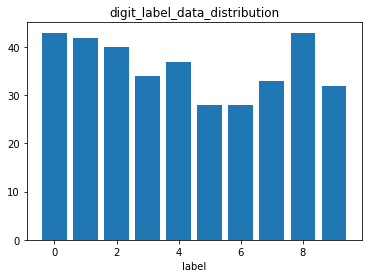

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# 전체데이터의 범주별 분포 체크 
label, count = np.unique(y_test, return_counts=True)
count_mean = np.mean(count)
count_std = round(np.std(count),2)
count_max = np.max(count) 
count_min = np.min(count)
print(label, count,count_mean,count_std, count_max,count_min)

plt.bar(label,count)
plt.xlabel('label')
plt.title('digit_label_data_distribution')
plt.show()


### 불균형 분포데이터(imbalanced data) 여부: 균형분포의 데이터(balanced data)임

#### 0부터 9까지의 y_test label 분포가 평균 36.0, 최대 55, 최소 28, 표준편차 5.55로 비교적 균형된 데이터라서,정확도(Accuracy)위주로 모델성능을 평가하면 되겠습니다

1위: SVC                 정확도(Accuracy)  0.99 

2위: Logistic Regression 정확도(Accuracy)  0.96

3위: Random_Forest       정확도(Accuracy)  0.95

4위: SGD                 정확도(Accuracy)  0.94 

5위: Decision_Tree       정확도(Accuracy)  0.84 

### [결론] 손글씨분류는 SVC가 정확도 99%로 가장 우수한 것으로 평가됨

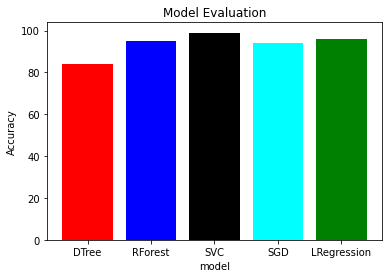

In [20]:
model= ['DTree','RForest','SVC','SGD','LRegression']
Accuracy =[ 84, 95, 99, 94, 96]
plt.bar(model,Accuracy,color=['red','blue','black','cyan','green'])
plt.xlabel('model')
plt.ylabel('Accuracy')
plt.title('Model Evaluation')
plt.show()

# 3. 와인분류

## (1) 데이터 준비

In [21]:
wines = load_wine()
print(type(wines))

<class 'sklearn.utils.Bunch'>


## (2) 데이터 이해하기
지피지기면 백전불태! 다루어야 할 데이터를 자세히 살펴봅시다.

In [22]:
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### Feature Data 지정하기 / Label Data 지정하기

In [23]:
wines_data = wines.data
wines_label = wines.target
print(wines_data)
print(wines_label)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Target Names 출력해 보기

In [24]:
print(wines.target_names)

['class_0' 'class_1' 'class_2']


### 데이터 Describe 해 보기

In [25]:
wines.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

### 데이터를 dataframe 화해 추가적 특징보기보기

In [26]:
winesdf = pd.DataFrame(data=wines.data, columns = wines.feature_names)
print(winesdf.shape)
print(winesdf.info())
print(winesdf.describe())

(178, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64


### 데이터 전처리하기
wine 데이터는 winesdf.info() 를 보면 null도 없고, feature별 size도 동일하여, fillna 전처리할 필요없슴, 정규화는 아래서 함

## (3) train, test 데이터 분리 및 정규화

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(wines_data,wines_label,test_size = 0.2, random_state = 7)

In [28]:
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## (4) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

### Decision Tree 사용해 보기

In [29]:
dt_clf =  DecisionTreeClassifier(random_state=7) 
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 7  0  0]
 [ 1 16  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



### Random Forest 사용해 보기

In [30]:
rf_clf =   RandomForestClassifier(random_state=7) 
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVM 사용해 보기

In [31]:
svc = SVC(random_state=7)
svc.fit(X_train,y_train)   
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))     

[[ 7  0  0]
 [ 0 17  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SGD Classifier 사용해 보기

In [32]:
sgd_clf = SGDClassifier(random_state=7)
sgd_clf.fit(X_train,y_train)
y_pred = sgd_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[ 7  0  0]
 [ 0 16  1]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      0.94      0.94        17
           2       0.92      0.92      0.92        12

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



### Logistic Regression 사용해 보기

In [33]:
lr_clf = LogisticRegression(random_state=7)
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



## (5) 모델을 평가해 보기

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

[0 1 2] [ 7 17 12] 12.0 4.08 17 7


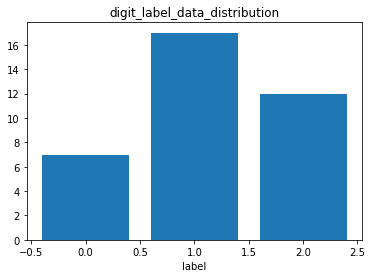

In [34]:
# 전체데이터의 범주별 분포 체크 
label, count = np.unique(y_test, return_counts=True)
count_mean = np.mean(count)
count_std = round(np.std(count),2)
count_max = np.max(count) 
count_min = np.min(count)
print(label, count,count_mean,count_std, count_max,count_min)

plt.bar(label,count)
plt.xlabel('label')
plt.title('digit_label_data_distribution')
plt.show()

### 불균형 분포데이터(imbalanced data) 여부:  비교적 균형성 데이터임, 한쪽으로 편중되지 않았슴

#### 0부터 9까지의 label 분포가 imbalanced는 아니나,비교적 균형적이라 정확도(Accuracy)와 f1score 위주로 모델성능을 평가하면 되겠습니다

1위: Random_Forest       정확도(Accuracy)  1.00   f1_score (1.0,1.0,1.0)

1위: SVC                 정확도(Accuracy)  1.00   f1_score (1.0. 1.0. 1.0)

3위: Logistic Regression 정확도(Accuracy)  0.97   f1_score (1.0,0.97,0.96)

4위: SGD                 정확도(Accuracy)  0.94   f1_score (1.00,0.94,0.92)

5위: Decision_Tree       정확도(Accuracy)  0.92   f1_score (0.93,0.91,0.91)

### [결론] wine분류에서는 Random_Forest 와 SVC 가 정확도100%, f1_score (100%,100%,100%)로 공동으로 가장 우수한 것으로 평가됨


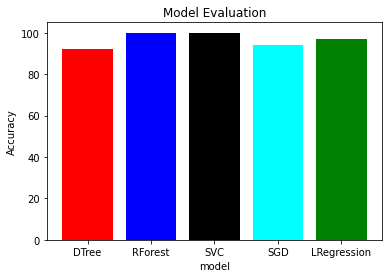

In [35]:
model= ['DTree','RForest','SVC','SGD','LRegression']
Accuracy =[92, 100, 100, 94, 97]
plt.bar(model,Accuracy,color=['red','blue','black','cyan','green'])
plt.xlabel('model')
plt.ylabel('Accuracy')
plt.title('Model Evaluation')
plt.show()

# 4. 유방암 진단 분류

## (1) 데이터 준비

In [36]:
cancers = load_breast_cancer()
print(type(cancers))

<class 'sklearn.utils.Bunch'>


## (2) 데이터 이해하기

In [37]:
cancers.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Feature Data 지정하기/ Label Data 지정하기

In [38]:
cancers_data = cancers.data
cancers_label = cancers.target
print(cancers_data)
print(cancers_label)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

### Target Names 출력해 보기

In [39]:
print(cancers.target_names)

['malignant' 'benign']


### 데이터 Describe 해 보기

In [40]:
cancers.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

### 데이터를 dataframe 화해 추가적 특징보기

In [41]:
cancersdf = pd.DataFrame(data=cancers.data, columns = cancers.feature_names)
print(cancersdf.shape)
print(cancersdf.info())
print(cancersdf.describe())

(569, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error

### 데이터 전처리하기
cancer 데이터는 cancersdf.info() 를 보면 null도 없고, feature별 size도 동일하여, fillna 전처리할 필요없슴, 정규화는 아래서 함

## (3) train, test 데이터 분리 및 정규화

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다.
X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(cancers_data,cancers_label,test_size = 0.2, random_state = 7)

In [43]:
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## (4) 다양한 모델로 학습시켜보기

학습데이터 X_train, y_train 을 활용해 분류기 모델을 만들어 봅시다. 어떤 모델이 가장 좋은 성능을 보일까요?

### Decision Tree 사용해 보기

In [44]:
dt_clf =  DecisionTreeClassifier(random_state=7) 
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[33  7]
 [ 3 71]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



### Random Forest 사용해 보기

In [45]:
rf_clf =   RandomForestClassifier(random_state=7) 
rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[37  3]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



### SVM 사용해 보기

In [46]:
svc = SVC(random_state=7)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[38  2]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



### SGD Classifier 사용해 보기

In [47]:
sgd_clf = SGDClassifier(random_state=7)
sgd_clf.fit(X_train,y_train)
y_pred = sgd_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[39  1]
 [ 1 73]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.99      0.99      0.99        74

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Logistic Regression 사용해 보기

In [48]:
lr_clf = LogisticRegression(random_state=7)
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

[[38  2]
 [ 0 74]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



## (5) 모델을 평가해 보기

학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요.

[0 1] [40 74] 57.0 17.0 74 40


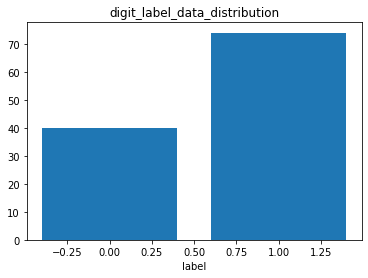

In [49]:
# y_test 데이터의 범주별 분포 체크 
label, count = np.unique(y_test, return_counts=True)
count_mean = np.mean(count)
count_std = round(np.std(count),2)
count_max = np.max(count) 
count_min = np.min(count)
print(label, count,count_mean,count_std, count_max,count_min)

plt.bar(label,count)
plt.xlabel('label')
plt.title('digit_label_data_distribution')
plt.show()

### 불균형 분포데이터(imbalanced data) 여부:  균형은 아니나, 한쪽으로 편중되지도 않았슴

#### 0부터 9까지의 label 분포가 imbalanced는 아니나,균형도 아니라서, 정확도(Accuracy)와 f1score 위주로 모델성능을 평가하면 되겠습니다


1위: Logistic Regression 정확도(Accuracy)  0.98   f1_score (0.97,0.99)
    
1위: SVC                 정확도(Accuracy)  0.98   f1_score (0.97,0.99)   
    
1위: SGD                 정확도(Accuracy)  0.98   f1_score (0.97,0.99)    
    
4위: Random_Forest       정확도(Accuracy)  0.97   f1_score (96,0.98)

5위: Decision_Tree       정확도(Accuracy)  0.91   f1_score (0.87,0.93)

### [결론] 유방암진단분류는  Logistic Regression,SVC , SGD 가 정확도 98%, f1_score (97%,99%)로 공동으로 우수한 것으로 평가됨

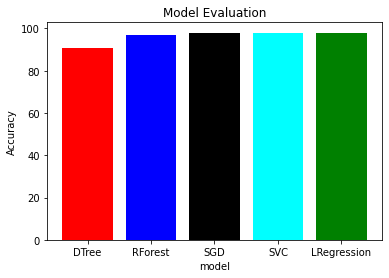

In [50]:
model= ['DTree','RForest','SGD','SVC','LRegression']
Accuracy =[91, 97, 98 ,98, 98]
plt.bar(model,Accuracy,color=['red','blue','black','cyan','green'])
plt.xlabel('model')
plt.ylabel('Accuracy')
plt.title('Model Evaluation')
plt.show()

# 5. 회고 및 종합평가










본 프로젝트는 scikit learn 의 데이터세트인 손글씨,와인,유방암진단의 3가지
데이터를통하여, 머신러닝의 주요 5가지 Classification model들을 성능비교해 보았다.

데이터를 로드하여,Bunch Type으로만들어져,파이썬의 dict형식의 메소드로 볼수있어, 데이터의 특성및 타겟을 주요 key를 통해 이해해보았고,또 데이터를 pandas의 DataFrame으로 만들어서,feature별 null이 있는지와 개략적 통계치, 전체적으로 행,열로된 table로 보면서,EDA를 시도했다.

데이터를 train_test_split()함수를 통해, 훈련데이터와 테스트데이터로 분리했다.
5가지 모델들을 import 한후 5가지 모델들을 데이터에 차례대로 적용하여,학습을 시키고, 그결과를 confusion matrix와 classification_report를 통해 평가해보았다.

모델평가시 imbalanced data로 인한 평가 metric의 accuracy만을 보았을때의 왜곡을 방지하기위해, 각 데이터들의 imbalanced여부를 체크하였다
테스트데이터의 label의 범주별 분포를 파악하여, 데이터가 imbalanced 되지 않았는지,bar챠트와 범주별 평균,표준편차,max,min을 통해 개략적으로 파악하였는데,.
손글씨데이터가 비교적 균형적이었고, 나머지도 imbalanced된 데이터는 없었다.
그래서,모델의 성능평가는 Accuracy 위주로 하였으며, 상대적으로 imbalanced되지는 않았지만, 덜 고른 분포를 보인 와인,유방암데이터는 Accuracy와 f1을 기준삼았고, 상대적으로 고른 분포를 보인 손글씨데이터는 Accuracy 로만 평가하였다.
종합적으로 3개데이터세트 및 5개모델을 종합해서 볼때는 데이터별 
Accuracy 순위(등수) 빈도로 평가하였다  

[종합평가] 3개의 데이터세트에서, 모델평가를 종합하면,5개의 모델들 중에서, 
손글씨, 와인,유방암진단 3개부문에서,모두 1위를 한 모델은 SVC모델이며,
와인에서는 Random_Forest가 공동1위한번,유방암진단에서는 Logistic Regression이 
공동1위 한번을 했는데, 종합적으로는 SVC모델이 가장 우수했고, 
Random_Forest와 Logistic Regression이 다음 순위임,
물론, 이 모델들의 평가는 3가지 데이터세트에 국한된 것이고,더 많은 양의
현실데이터에서는 평가가 달라질수 있을 것이다.

[회고 결론] 이번 프로젝트를 통해서,데이터전처리및 모델별학습,classification_report를 통한 다면적 성능평가기준(recall,precision에대한 세부적이해 및 정리), 그리고 머신러닝의 주요 5개모델들을 실행시켜보면서,
머신러닝기법에대한 간결 명쾌한 정리와 이해가 더 체계적으로 되어, 유익한 경험이었다.

[참고자료]
1. Aiffel LMS 노드 Exploration 01 classification
2.https://scikit-learn.org/stable/index.html


이 경환